In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.drop('Time',axis=1,inplace=True)

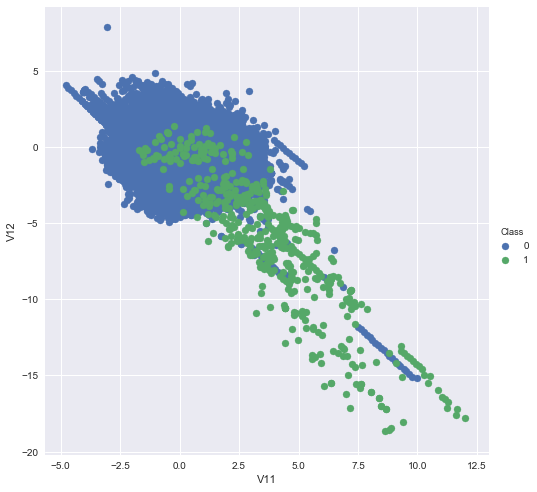

In [5]:
sns.set(style="darkgrid")
sns.FacetGrid(data, hue="Class", size=7).map(plt.scatter, "V11", "V12").add_legend()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
data_good=data[data['Class']!=1]

In [8]:
Y_good=data_good[['Class']]

In [9]:
data_good.drop(['Class'],axis=1,inplace=True)

/usr/local/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_fraud=data[data['Class']==1]

In [11]:
Y_fraud=data_fraud[['Class']]

In [12]:
data_fraud.drop(['Class'],axis=1,inplace=True)

/usr/local/anaconda3/5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(data_good,Y_good,random_state=0,test_size=0.3)

In [14]:
X_train.shape

(199020, 29)

In [15]:
X_test.shape

(85295, 29)

In [16]:
from sklearn.svm import OneClassSVM

In [17]:
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [18]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(data_fraud)

In [19]:
Y_train=1+Y_train

In [20]:
Y_train=Y_train.values

In [21]:
Y_test=Y_test.values

In [22]:
Y_fraud=-2+Y_fraud

In [23]:
Y_fraud=Y_fraud.values

In [24]:
n_error_train = y_pred_train[y_pred_train == -1].size
FP = y_pred_test[y_pred_test == -1].size
FN = y_pred_outliers[y_pred_outliers == 1].size

In [25]:
n_correct_train = y_pred_train[y_pred_train == 1].size
TN = y_pred_test[y_pred_test == 1].size
TP = y_pred_outliers[y_pred_outliers == -1].size

In [26]:
Recall=TP/(TP+FN)

In [27]:
Precision=TP/(TP+FP)

In [28]:
Recall

0.9227642276422764

In [29]:
Precision

0.028197006397118193